## `Handling Univariate Missing Data (Random Value Imputation)`

- Through **`Random Value Imputation`** we can impute both *`Numerical`* and *`Categorical`* missing data.
- Here we fill the *`missing values`* with *`random numbers`* which are present in that column.
- It is an easy task, though we have to do it using `Pandas` as there is no library in `Sklearn` to do this.
- **Advantages:**
    - This technique does not much change the distribution of the data.
    - Although this technique doesn't work well with **Decision Tree** based algorithms.
    
- **Disadvantages**
    - Here the *`Covariance`* may get disturbed a bit, as there is randomness introduced in the data.
    - It is memory heavy for deployment, as we need to store the original training set to extract values from, and replace the `NA` values in coming observations.

- **`When to use?`**
    - This technique mostly used when we use **Linear** algorithms on the data and not **Tree** based algorithms.

## `Missing Indicator`

- Here we create a new column for each missing data in each column.
- This new column has only two values **True**(if corresponding value is missing) and **False**(if corresponding value is not missing).
- Here it helps the model to differentiate between rows with *`missing values`* and normal rows. As a result the performance of the model gets improved.
- This technique doesn't always work well but can be tried when the **`accuracy`** or **`r2 score`** of the model not improving.

## `How can we automatically select a paramter value for Imputation technique?`

- Here we need to use the technique of `GridSearchCV` for the best parameters.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.impute import MissingIndicator,SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

### Random Value Imputation on *`Numerical`* data

In [2]:
# importing the dataset with required columns

df = pd.read_csv('datasets/train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
# Checking percentage of missing values

df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [4]:
# Creating independent and dependent variables

X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

X.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [5]:
# Doing train test split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2)

X_train.shape, X_test.shape

((712, 2), (179, 2))

In [6]:
X_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


- Creating Completely new columns so we can observe the changes

In [7]:
# Creating columns for both train and test datasets

X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_train['Age']

In [8]:
X_train.head()

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0


In [9]:
# let's again check for the missing value percentage
# So we can see the 'Age_imputed' has same number of missing values as 'Age' column

X_train.isnull().mean()*100

Age            20.786517
Fare            0.000000
Age_imputed    20.786517
dtype: float64

- **Now here we replaced all the missing values in `Age_imputed` column with some random values of the `Age` column**

#### **Logic**

In [10]:
# Finding the rows in column 'Age_imputed' where the value is missing
# Here 'X_train['Age_imputed'].isnull()' works as a condition

X_train[X_train['Age_imputed'].isnull()]

,Age,Fare,Age_imputed
77,NaN,8.0500,NaN
868,NaN,9.5000,NaN
334,NaN,133.6500,NaN
295,NaN,27.7208,NaN
792,NaN,69.5500,NaN
...,...,...,...
674,NaN,0.0000,NaN
466,NaN,0.0000,NaN
584,NaN,8.7125,NaN
527,NaN,221.7792,NaN


In [11]:
# Fetching the rows where the value is missing

X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

77    NaN
868   NaN
334   NaN
295   NaN
792   NaN
       ..
674   NaN
466   NaN
584   NaN
527   NaN
168   NaN
Name: Age_imputed, Length: 148, dtype: float64

In [12]:
# Checking the number of rows if we drop all the rows with NA values
# So here we can see 148 rows less than the actual dataset

X_train_without_na =X_train['Age_imputed'].dropna()
X_train_without_na.shape

(564,)

In [13]:
# Now extracting any number of values where there is no missing values
# Suppose here we are extracting 10 random values out of the non missing dataset

X_train_without_na.sample(10).values

array([31., 37., 17., 17., 29., 25., 26., 52., 21., 24.])

In [14]:
# Number of rows with missing values

X_train['Age_imputed'].isnull().sum()

148

In [15]:
# Now transforming the number 10 with the number of values we want to replace that is 148 in this case
# So here the number 10 is replaced by 'X_train['Age_imputed'].isnull().sum()'

X_train_without_na.sample(X_train['Age_imputed'].isnull().sum()).values

array([25.  , 25.  , 28.  , 45.  , 20.  , 39.  , 18.  , 27.  , 19.  ,
       22.  , 30.  , 24.  , 40.  , 23.  , 18.  , 16.  , 24.  , 34.  ,
       35.  , 51.  , 31.  ,  5.  , 32.  , 30.  , 29.  , 22.  , 28.  ,
       48.  , 40.  , 31.  , 30.  , 24.  , 32.  , 36.  , 30.  , 24.  ,
       27.  , 29.  , 34.  , 32.5 , 40.  , 19.  , 33.  , 22.  , 22.  ,
       36.  , 50.  , 54.  , 23.  , 18.  , 30.  ,  4.  , 23.  , 54.  ,
       38.  ,  2.  , 47.  , 25.  , 60.  , 70.  , 56.  , 27.  , 19.  ,
       19.  , 11.  , 36.5 , 25.  , 31.  , 19.  , 54.  , 29.  , 20.  ,
       71.  ,  0.75, 24.  , 25.  ,  3.  , 42.  , 45.  , 22.  , 24.  ,
       36.  ,  1.  , 24.  , 31.  ,  9.  , 38.  , 24.  , 18.  , 29.  ,
        0.42, 42.  , 23.  ,  7.  , 24.  ,  3.  , 21.  , 28.5 , 48.  ,
       17.  , 40.  , 33.  , 62.  , 36.  , 30.  , 66.  , 26.  , 31.  ,
       18.  , 34.  , 39.  , 31.  , 47.  , 39.  , 16.  , 33.  , 40.  ,
       27.  , 17.  , 34.  , 24.  ,  7.  , 41.  , 30.  , 41.  , 31.  ,
        4.  , 11.  ,

In [16]:
# So here we got the number of random values as 148

len(X_train_without_na.sample(X_train['Age_imputed'].isnull().sum()).values)

148

In [17]:
# Now replacing the NaN valued rows of that column with this random values

X_train_imputed = X_train['Age_imputed'].dropna().sample(X_train['Age_imputed'].isnull().sum()).values
X_train_imputed.shape

(148,)

#### **Applying Logic**

In [18]:
# Applying the previous logic for both train and test datasets

X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age_imputed'].dropna().sample(
    X_train['Age_imputed'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age_imputed'].dropna().sample(
    X_test['Age_imputed'].isnull().sum()).values

In [19]:
# Now checking again for missing values

X_train.isnull().mean()*100

Age            20.786517
Fare            0.000000
Age_imputed     0.000000
dtype: float64

**Notes:**

- So now we can see that even though the *`missing values`* in the `Age` column are there but all the *`missing values`* in the `Age_imputed` column are replaced by random values.

**Now we can compare the distribution of both the columns**

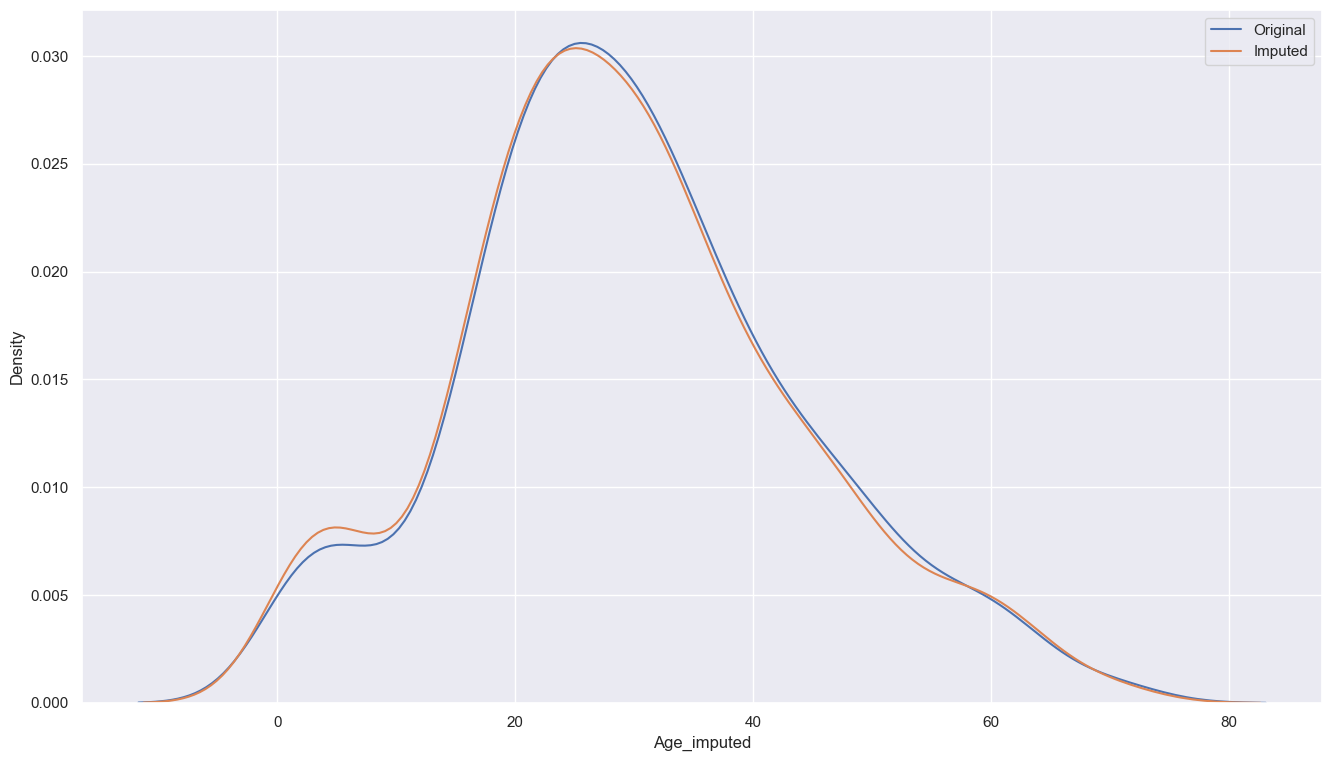

In [20]:
# Comparison

plt.figure(figsize=(16, 9))
sns.distplot(X_train['Age'], label='Original', hist=False)
sns.distplot(X_train['Age_imputed'], label = 'Imputed', hist=False)

plt.legend()
plt.show()

**Notes:**

- We can see now the distributions are almost same.

In [21]:
# Checking difference in variance
# There is no change in variance

print(f"Original Variable's variance is: {X_train['Age'].var()}")
print(f"Variance after random imputation is: {X_train['Age_imputed'].var()}")

Original Variable's variance is: 204.34951339046142
Variance after random imputation is: 208.00320385732235


In [22]:
# Checking difference in Covariance

X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,75.905338
Age,71.512440,204.349513,204.349513
Age_imputed,75.905338,204.349513,208.003204


**Notes:**

- Here we can see difference in relation between `Age` and `Age_imputed` with respect to `Fare`.

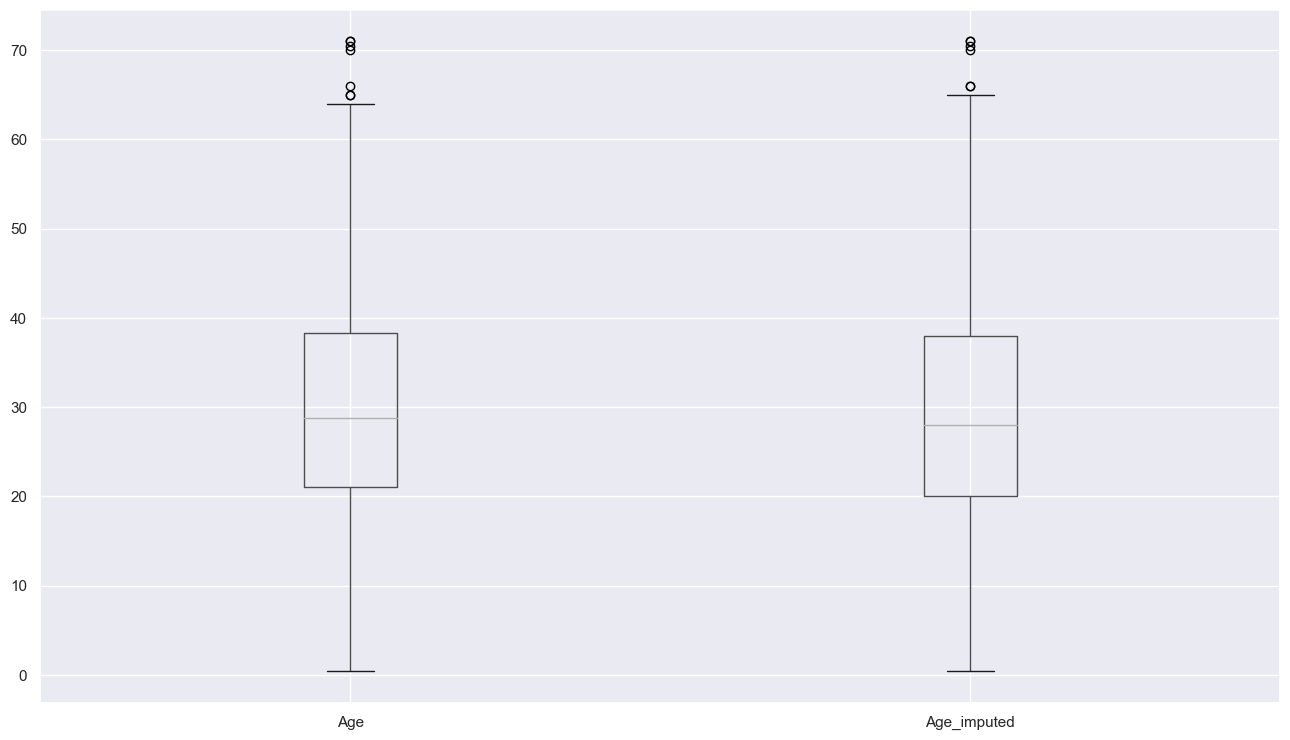

In [23]:
# Checking for outliers

plt.figure(figsize=(16, 9))
X_train[['Age', "Age_imputed"]].boxplot()
plt.show()

**Notes:**

- So here we can see not much impact on outliers by this imputation technique.
- When there is a project in production and we use this technique then it is possible thats each time it will give different outputs for same inputs, as the values to fill the *`missing values`* are selected randomly.
- So to overcome this issue we should create a way where for same given inputs the model should select same random number. So to do this put the value of current observation in the random state.
- Example:

**`sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))`**

### Random Value Imputation on *`Categorical`* data

In [24]:
# Here we are using different dataset with required columns

df = pd.read_csv("datasets/cat_train.csv", usecols=['GarageQual','FireplaceQu','SalePrice'])
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [25]:
# How much values are missing in each category

df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [26]:
# Creating independent and dependent variables
# here we will use all the data as X including output column 

X = df
y = df['SalePrice']

In [27]:
# Doing train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape, X_test.shape

((1168, 3), (292, 3))

In [28]:
# Creating new columns like previous case

X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [29]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
879,NaN,TA,136500,TA,NaN
1452,NaN,TA,145000,TA,NaN
146,NaN,Fa,105000,Fa,NaN
552,Gd,TA,255500,TA,Gd
905,NaN,TA,128000,TA,NaN


In [30]:
# Now doing the imputation
# Here again we apply the same logic as we did for Numerical data

X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(
    X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(
    X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(
    X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(
    X_test['FireplaceQu'].isnull().sum()).values

In [31]:
# Creating a dataframe to see the frequency of each column before and after imputation
# This is for GaragrQual column

temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
TA,0.951043,0.952911
Fa,0.037171,0.035959
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [32]:
# This is for FireplaceQu column

temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.393151
TA,0.412439,0.331507
Fa,0.040917,0.033562
Po,0.027823,0.022603
Ex,0.024550,0.019178


**Notes:**

- Here we can see there is not much difference in frequency of categories in case of column `GarageQual` as the percentage of *`missing values`* were less but we can see major changes in case of column `FireplaceQu`.

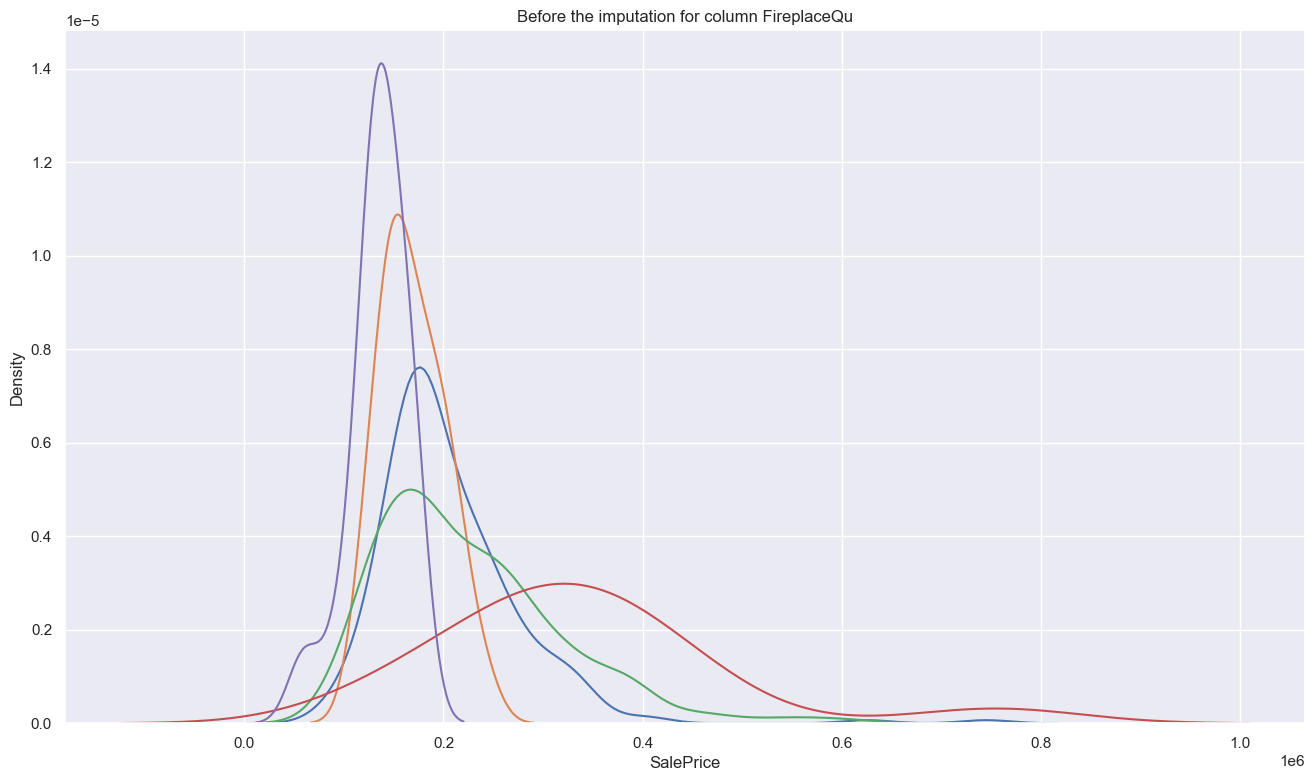

In [35]:
# Visualizing by plotting graph

plt.figure(figsize=(16, 9))
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], hist=False, label=category)
    plt.title("Before the imputation for column FireplaceQu")
plt.show()

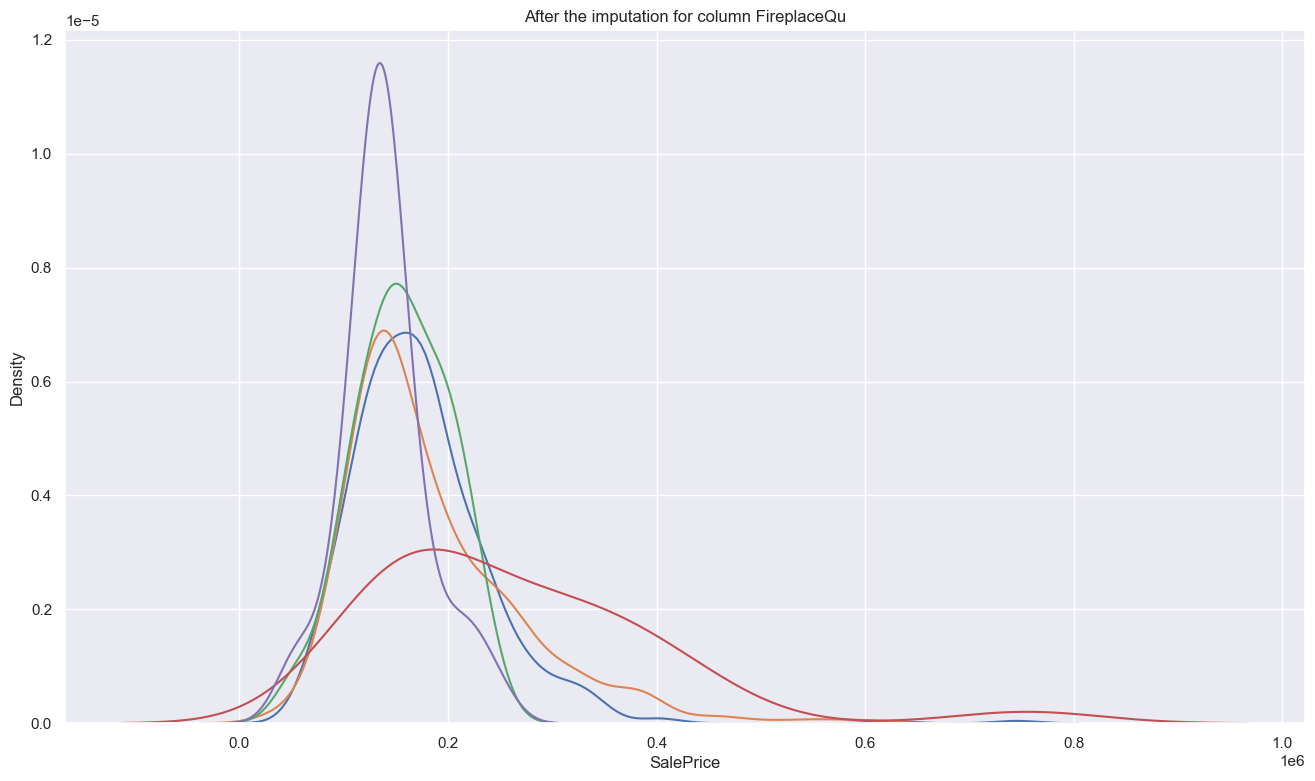

In [36]:
plt.figure(figsize=(16, 9))
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
    plt.title("After the imputation for column FireplaceQu")
plt.show()

**Notes:**

- So we can see there is huge change in distributions for different categories in case of column `FireplaceQu`. So if we are using a `linear` model so it is not good choice to do *`Random Value Imputation`* on this column.

### `Missing Indicator`

In [37]:
# Creating dataframe

df = pd.read_csv('datasets/train.csv', usecols=['Age', 'Fare', 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [38]:
# Creating independent and dependent variables

X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

X.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [39]:
# Doing train test split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape

((712, 2), (179, 2))

In [40]:
X_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


#### **Checking `accuracy` without using the `missing indicator` technique**

In [41]:
# Here we are replacing all the missing values with mean of that distribution using SimpleImputer()

si = SimpleImputer()

X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)

In [43]:
# Now creating a Logistic Regression model to check accuracy

clf = LogisticRegression()

# training the model
clf.fit(X_train_trf,y_train)

# doing predictions
y_pred = clf.predict(X_test_trf)

# Checking accuracy
accuracy1 = accuracy_score(y_test,y_pred)
print(f"The accuracy of the model without using missing indicator technique is: {(accuracy1)*100:.2f}%")

The accuracy of the model without using missing indicator technique is: 61.45%


#### **Now Checking `accuracy` with the `missing indicator` technique**

In [44]:
# Here we need to use the MissingIndicator() of Sklearn library

mi = MissingIndicator()

X_train_missing = mi.fit_transform(X_train)
X_test_missing = mi.transform(X_test)

In [45]:
# It is a completely ne column based on the 'Age' column containing False and True

X_train_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [46]:
# Now adding this new columns to our original dataset

X_train['Age_NA'] = X_train_missing
X_test['Age_NA'] = X_test_missing

In [47]:
# Checking the training dataset after adding the new column

X_train.sample(10)

,Age,Fare,Age_NA
598,NaN,7.2250,True
145,19.0,36.7500,False
344,36.0,13.0000,False
94,59.0,7.2500,False
40,40.0,9.4750,False
316,24.0,26.0000,False
124,54.0,77.2875,False
734,23.0,13.0000,False
64,NaN,27.7208,True
125,12.0,11.2417,False


In [48]:
# Here we are replacing all the missing values with mean of that distribution using SimpleImputer()

si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)

In [49]:
# Now again creating a Logistic Regression model to check accuracy

clf = LogisticRegression()

# training the model
clf.fit(X_train_trf2, y_train)

# doing predictions
y_pred = clf.predict(X_test_trf2)

# Checking accuracy
accuracy2 = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model using missing indicator technique is: {(accuracy2)*100:.2f}%")

The accuracy of the model using missing indicator technique is: 63.13%


**Notes:**

- Here we can see that the accuracy increased by `2%`.
- We can also use this technique through `SimpleImputer()` as there is a parameter named `add_indicator`, just set it's value as `True`.

#### Using the `SimpleImputer()` to use the technique

In [50]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=2)
X_train.shape, X_test.shape

((712, 2), (179, 2))

In [51]:
X_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


In [52]:
si = SimpleImputer(add_indicator=True)

X_train = si.fit_transform(X_train)
X_test = si.transform(X_test)

In [53]:
# Now again creating a Logistic Regression model to check accuracy

clf = LogisticRegression()

# training the model
clf.fit(X_train, y_train)

# doing predictions
y_pred = clf.predict(X_test)

# Checking accuracy
accuracy2 = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model using missing indicator technique is: {(accuracy2)*100:.2f}%")

The accuracy of the model using missing indicator technique is: 63.13%


- **So we can see same accuracy in this case. This is cleaner way to use this technique than the previous way.**